#### Test FORBOW 

In [ ]:
import datetime, sys, warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from IPython.display import Image
from pyprojroot import here

sys.path.insert(0, f"{here()}/src")

from predict import create_testdataloader, predictbrainage
from plots import scatter_predicted_chronological, scatter_bag_age, age_distribution_plot, brainage_distribution_plot

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_columns', None)
pd.reset_option("mode.chained_assignment")

Hostname is: neptune
Found 8 models, using /home/murage/Documents/repos/cnnmlp/models/2025-08-14_best_cnnmlpclassifier_model.pth
Model: /home/murage/Documents/repos/cnnmlp/models/2025-08-14_best_cnnmlpclassifier_model.pth
Model: /home/murage/Documents/repos/cnnmlp/models/2025-07-28_best_cnmlp_model.pth
Model: /home/murage/Documents/repos/cnnmlp/models/2025-08-13_20epochs-best_cnnmlpclassifier_model.pth
Model: /home/murage/Documents/repos/cnnmlp/models/2025-08-18_best_cnnmlpclassifier_model.pth
Model: /home/murage/Documents/repos/cnnmlp/models/2025-08-17_best_cnnmlpclassifier_model.pth
Model: /home/murage/Documents/repos/cnnmlp/models/2025-08-15_best_cnnmlpclassifier_model.pth
Model: /home/murage/Documents/repos/cnnmlp/models/2025-08-15_L1best_cnnmlpclassifier_model.pth
Model: /home/murage/Documents/repos/cnnmlp/models/2025-08-13_best_cnnmlpclassifier_model.pth


In [3]:
proj_dir = here()

#### Load Test Data

In [4]:
df, test_dataloader = create_testdataloader('forbow')

Found 2 csv files
T1 shape: (710, 1), Pheno shape: (714, 36)
df shape: (714, 4), Missing n shape: (30, 4)
Final df shape: (684, 8)
Index: 0, 3, Image shape: torch.Size([1, 121, 145, 121]), Label: tensor([-0.4591])
Index: 1, 2, Image shape: torch.Size([1, 121, 145, 121]), Label: tensor([-0.6301])
Index: 2, 2, Image shape: torch.Size([1, 121, 145, 121]), Label: tensor([-0.8784])


In [5]:
df.head()

participant_id     sex   scan_age                filename  \
0       sub-002A    Male  12.774812  FORBOW-sub-002A.nii.gz   
1       sub-003A    Male  11.786448  FORBOW-sub-003A.nii.gz   
2       sub-004A    Male  10.351814  FORBOW-sub-004A.nii.gz   
3       sub-007A  Female  14.239562  FORBOW-sub-007A.nii.gz   
4       sub-006A  Female  17.032170  FORBOW-sub-006A.nii.gz   

               filename_y age_bracket  age_bracket_class  scan_age_z  
0  FORBOW-sub-002A.nii.gz       12-14                  3   -0.459079  
1  FORBOW-sub-003A.nii.gz        9-11                  2   -0.630111  
2  FORBOW-sub-004A.nii.gz        9-11                  2   -0.878367  
3  FORBOW-sub-007A.nii.gz       12-14                  3   -0.205611  
4  FORBOW-sub-006A.nii.gz       15-17                  4    0.277636

In [6]:
modelresults = predictbrainage(test_dataloader)

In [7]:
modelresults['age'].flatten().shape

(684,)

In [8]:
df.columns = df.columns.str.replace(' ', '')
df["chronological_age"] = modelresults["age"].flatten()
df["brain_age"] = modelresults["predicted"].flatten()
df["brain_age_gap"] = df["brain_age"] - df["scan_age"]  

In [9]:
#datem = datetime.today().strftime("%Y-%m-%d")
#df.to_csv(f"{here()}/data/processed/{datem}_frb_cnnmlp_predictions.csv", index=False)

In [10]:
df.sample(3)

participant_id     sex   scan_age                filename  \
637       sub-224E    Male  13.927447  FORBOW-sub-224E.nii.gz   
305       sub-081C    Male  12.243669  FORBOW-sub-081C.nii.gz   
500       sub-062G  Female  16.194387  FORBOW-sub-062G.nii.gz   

                 filename_y age_bracket  age_bracket_class  scan_age_z  \
637  FORBOW-sub-224E.nii.gz       12-14                  3   -0.259621   
305  FORBOW-sub-081C.nii.gz       12-14                  3   -0.550991   
500  FORBOW-sub-062G.nii.gz       15-17                  4    0.132662   

     chronological_age  brain_age  brain_age_gap  
637          -0.259621  -0.100033     -14.027480  
305          -0.550991  -0.846660     -13.090328  
500           0.132662   1.082957     -15.111431

In [11]:
df['chronological_age_'] = (df['chronological_age'] * 5.778836817291233) + 15.427753927254452
df['brainage_'] = (df['brain_age'] * 5.778836817291233) + 15.427753927254452
df['brainagegap_'] = df['brainage_'] - df['chronological_age_']

In [12]:
df[['participant_id', 'scan_age', 'chronological_age_', 'brainage_']].sample(5)

participant_id   scan_age  chronological_age_  brainage_
462       sub-123E  14.318960           14.318960  15.187217
72        sub-069A  19.422313           19.422314  20.578379
173       sub-127A  13.508556           13.508556  18.680462
406       sub-183C  11.154004           11.154005  14.114093
389       sub-046E  14.685832           14.685832  20.501158

In [13]:
df.age_bracket_class.value_counts()

age_bracket_class
3    179
2    178
4    164
5    100
6     41
7     21
1      1
Name: count, dtype: int64

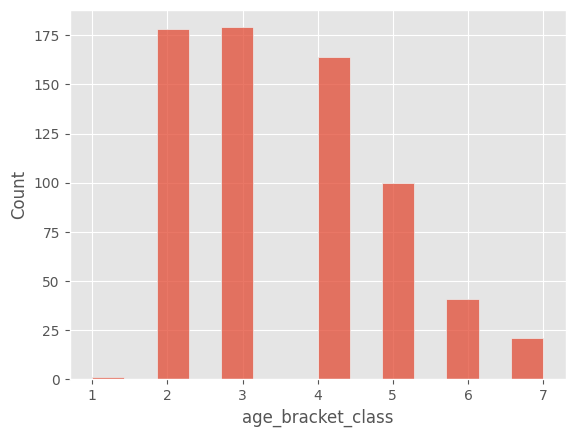

In [14]:
sns.histplot(df['age_bracket_class'])
plt.show()

#### Plots

In [21]:
df= pd.read_csv(f"{here()}/data/processed/2025-08-20_frb_cnnmlp_predictions.csv")

In [22]:
df.head()

participant_id     sex   scan_age                filename  \
0       sub-002A    Male  12.774812  FORBOW-sub-002A.nii.gz   
1       sub-003A    Male  11.786448  FORBOW-sub-003A.nii.gz   
2       sub-004A    Male  10.351814  FORBOW-sub-004A.nii.gz   
3       sub-007A  Female  14.239562  FORBOW-sub-007A.nii.gz   
4       sub-006A  Female  17.032170  FORBOW-sub-006A.nii.gz   

               filename_y age_bracket  age_bracket_class  scan_age_z  \
0  FORBOW-sub-002A.nii.gz       12-14                  3   -0.459079   
1  FORBOW-sub-003A.nii.gz        9-11                  2   -0.630111   
2  FORBOW-sub-004A.nii.gz        9-11                  2   -0.878367   
3  FORBOW-sub-007A.nii.gz       12-14                  3   -0.205611   
4  FORBOW-sub-006A.nii.gz       15-17                  4    0.277636   

   chronological_age  brain_age  brain_age_gap  chronological_age_  brainage_  \
0          -0.459079  -0.014114     -12.788926           12.774813  15.346189   
1          -0.630111  -0.743053     -12.529501           11.786448  11.133772   
2          -0.878367  -0.358791     -10.710605           10.351814  13.354357   
3          -0.205611  -0.667009     -14.906571           14.239562  11.573216   
4           0.277636  -0.673566     -17.705736           17.032170  11.535325   

   brainagegap_  
0      2.571376  
1     -0.652676  
2      3.002543  
3     -2.666346  
4     -5.496844

In [23]:
df.drop(['chronological_age', 'brain_age', 'brain_age_gap'], axis=1, inplace=True)
df.rename(columns={'chronological_age_': 'chronological_age', 'brainage_': 'brain_age', 'brainagegap_': 'brain_age_gap'}, inplace=True)

In [24]:
datem = datetime.datetime.today().strftime("%Y-%m-%d")
df.to_csv(f"{here()}/data/processed/{datem}_frb_cnnmlp_predictions.csv", index=False)

In [25]:
df.sample(3)

participant_id     sex   scan_age                filename  \
109       sub-005C    Male  13.667351  FORBOW-sub-005C.nii.gz   
431       sub-197C    Male  15.230664  FORBOW-sub-197C.nii.gz   
590       sub-130E  Female  14.888433  FORBOW-sub-130E.nii.gz   

                 filename_y age_bracket  age_bracket_class  scan_age_z  \
109  FORBOW-sub-005C.nii.gz       12-14                  3   -0.304629   
431  FORBOW-sub-197C.nii.gz       15-17                  4   -0.034105   
590  FORBOW-sub-130E.nii.gz       12-14                  3   -0.093327   

     chronological_age  brain_age  brain_age_gap  
109          13.667352  18.989819       5.322467  
431          15.230664  14.554197      -0.676467  
590          14.888433  10.746330      -4.142103

In [26]:
age_distribution_plot(df, 'frb', 'blue')

<ggplot: (640 x 480)>


/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: /home/murage/Documents/repos/cnnmlp/figures/frb_age_distribution.png
/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/layer.py:372: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


In [27]:
scatter_predicted_chronological(df, 'frb')

min age: 8.733745, median: 14.620124, max: 26.548939
<ggplot: (800 x 800)>


/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 8 x 8 in image.
/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: /home/murage/Documents/repos/cnnmlp/figures/frb_chronological_predicted_plot.png


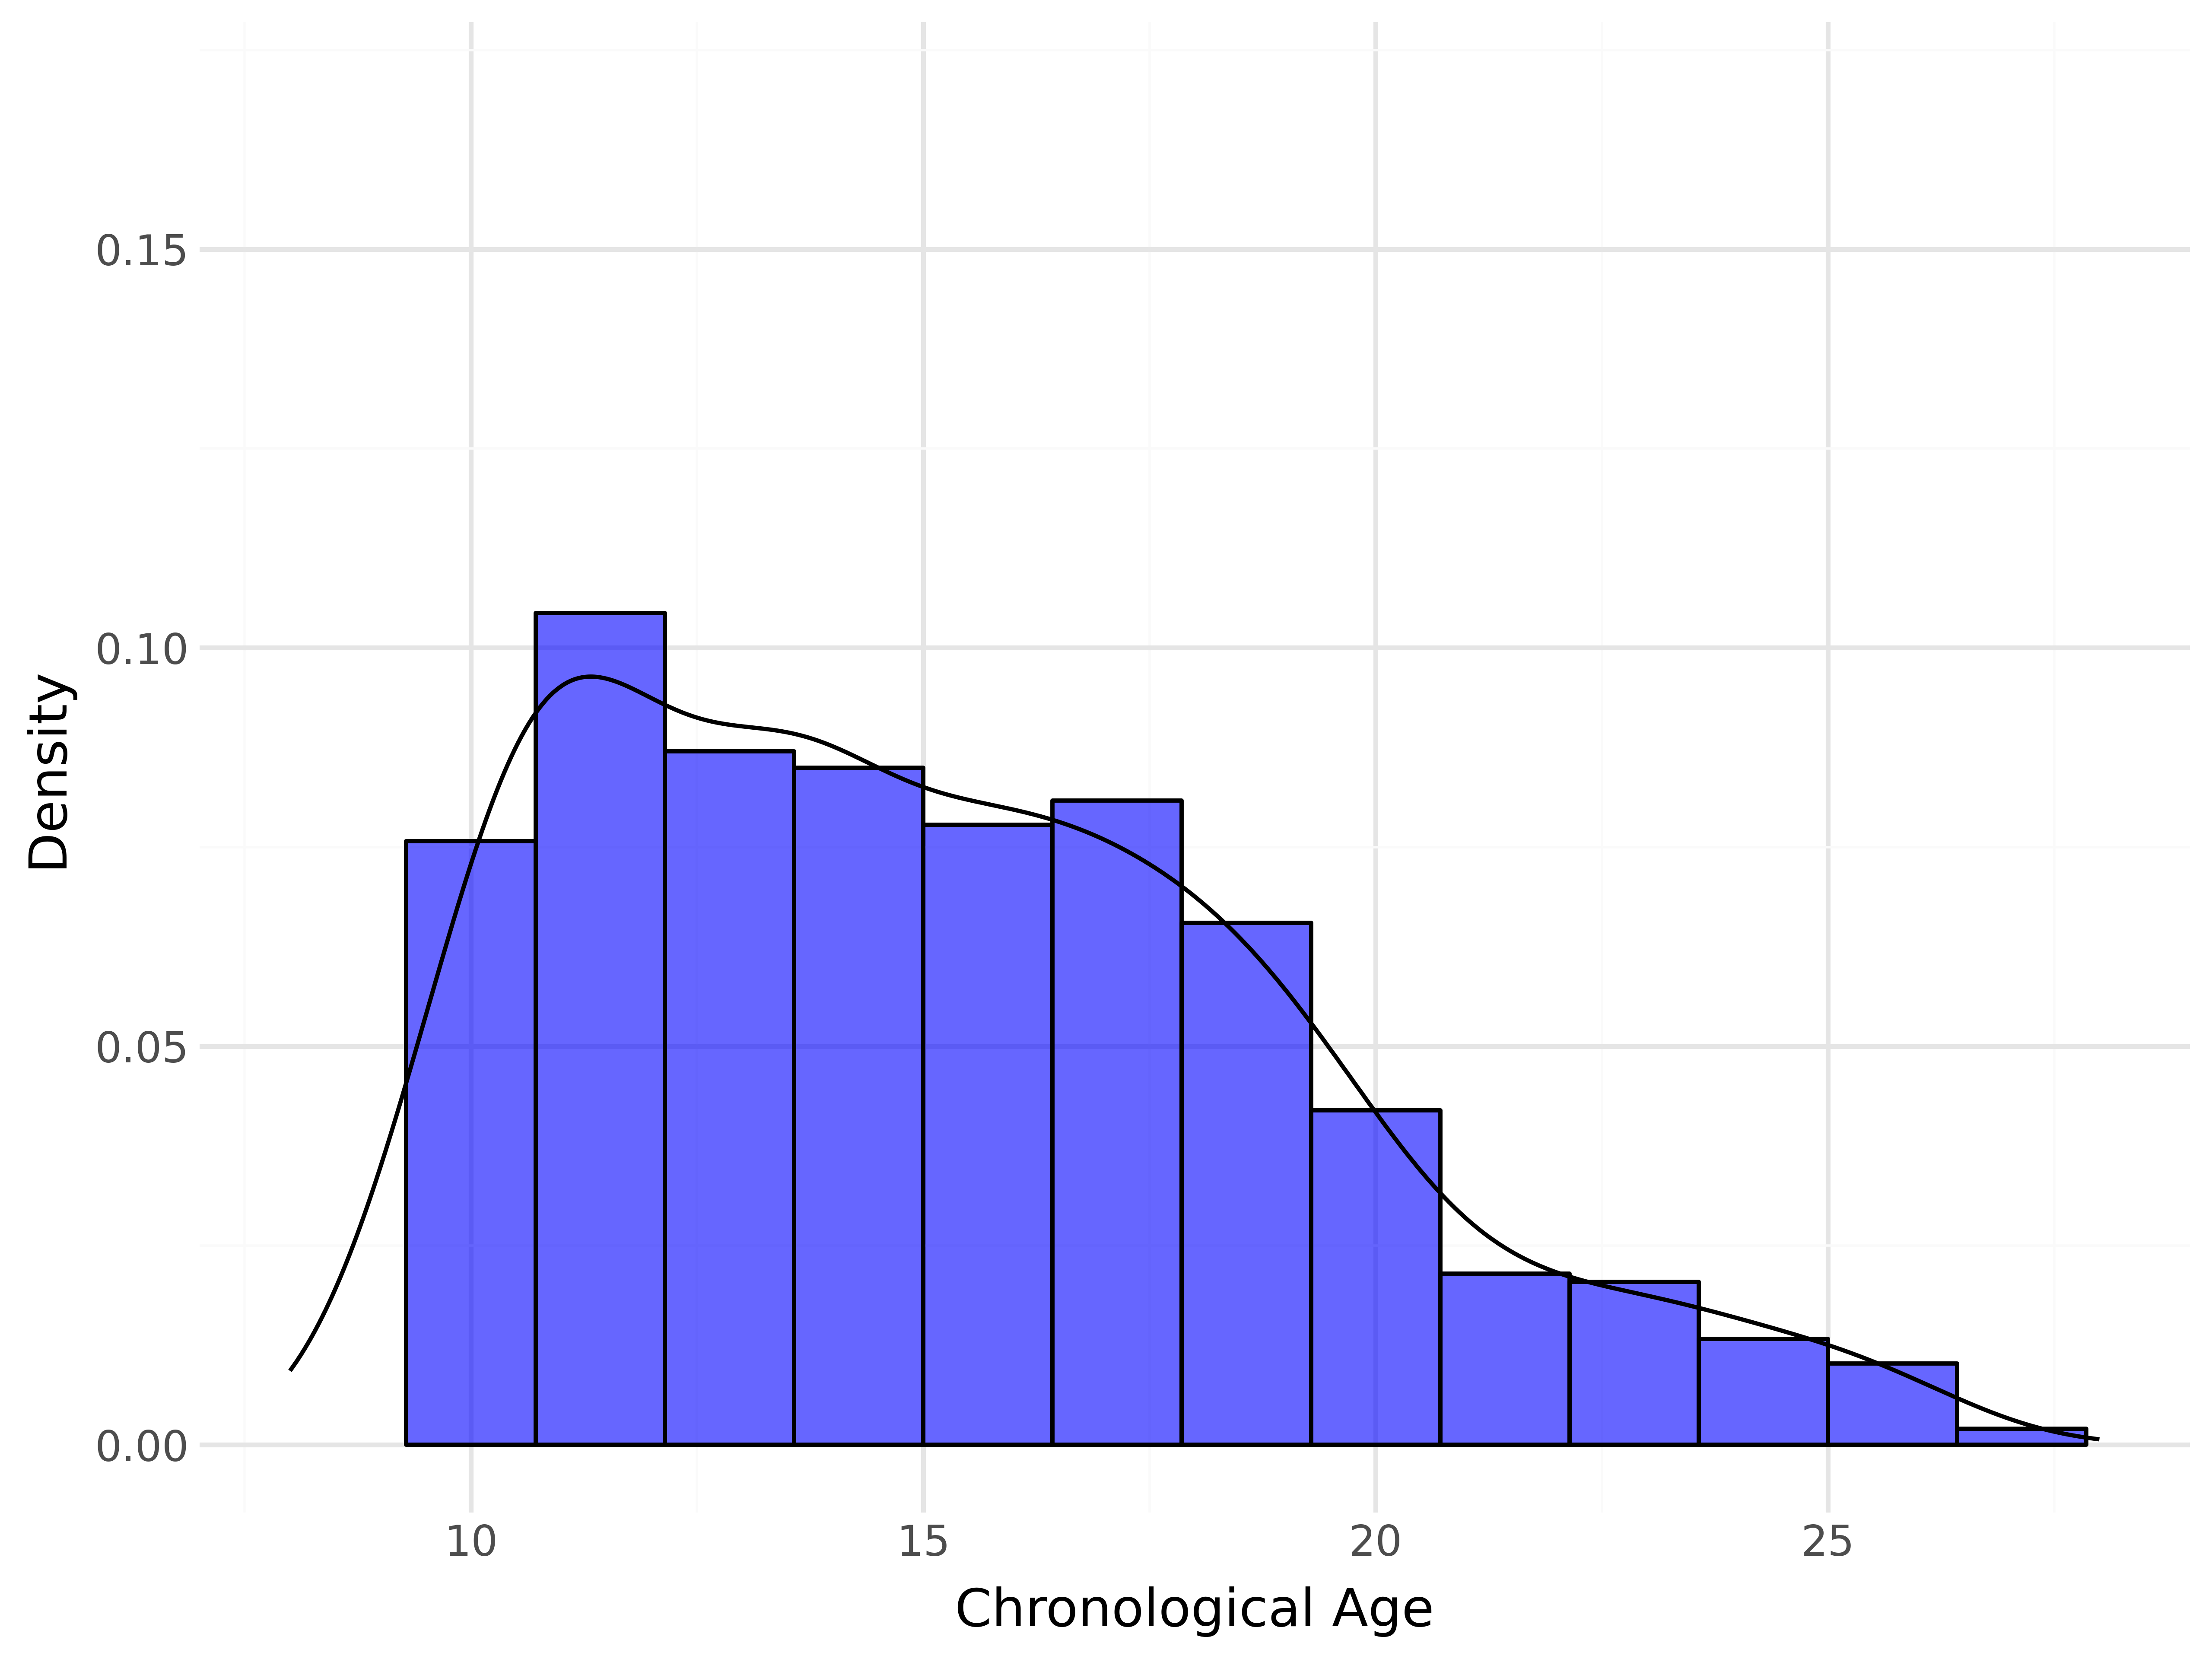

In [28]:
Image(f"{here()}/figures/frb_age_distribution.png")

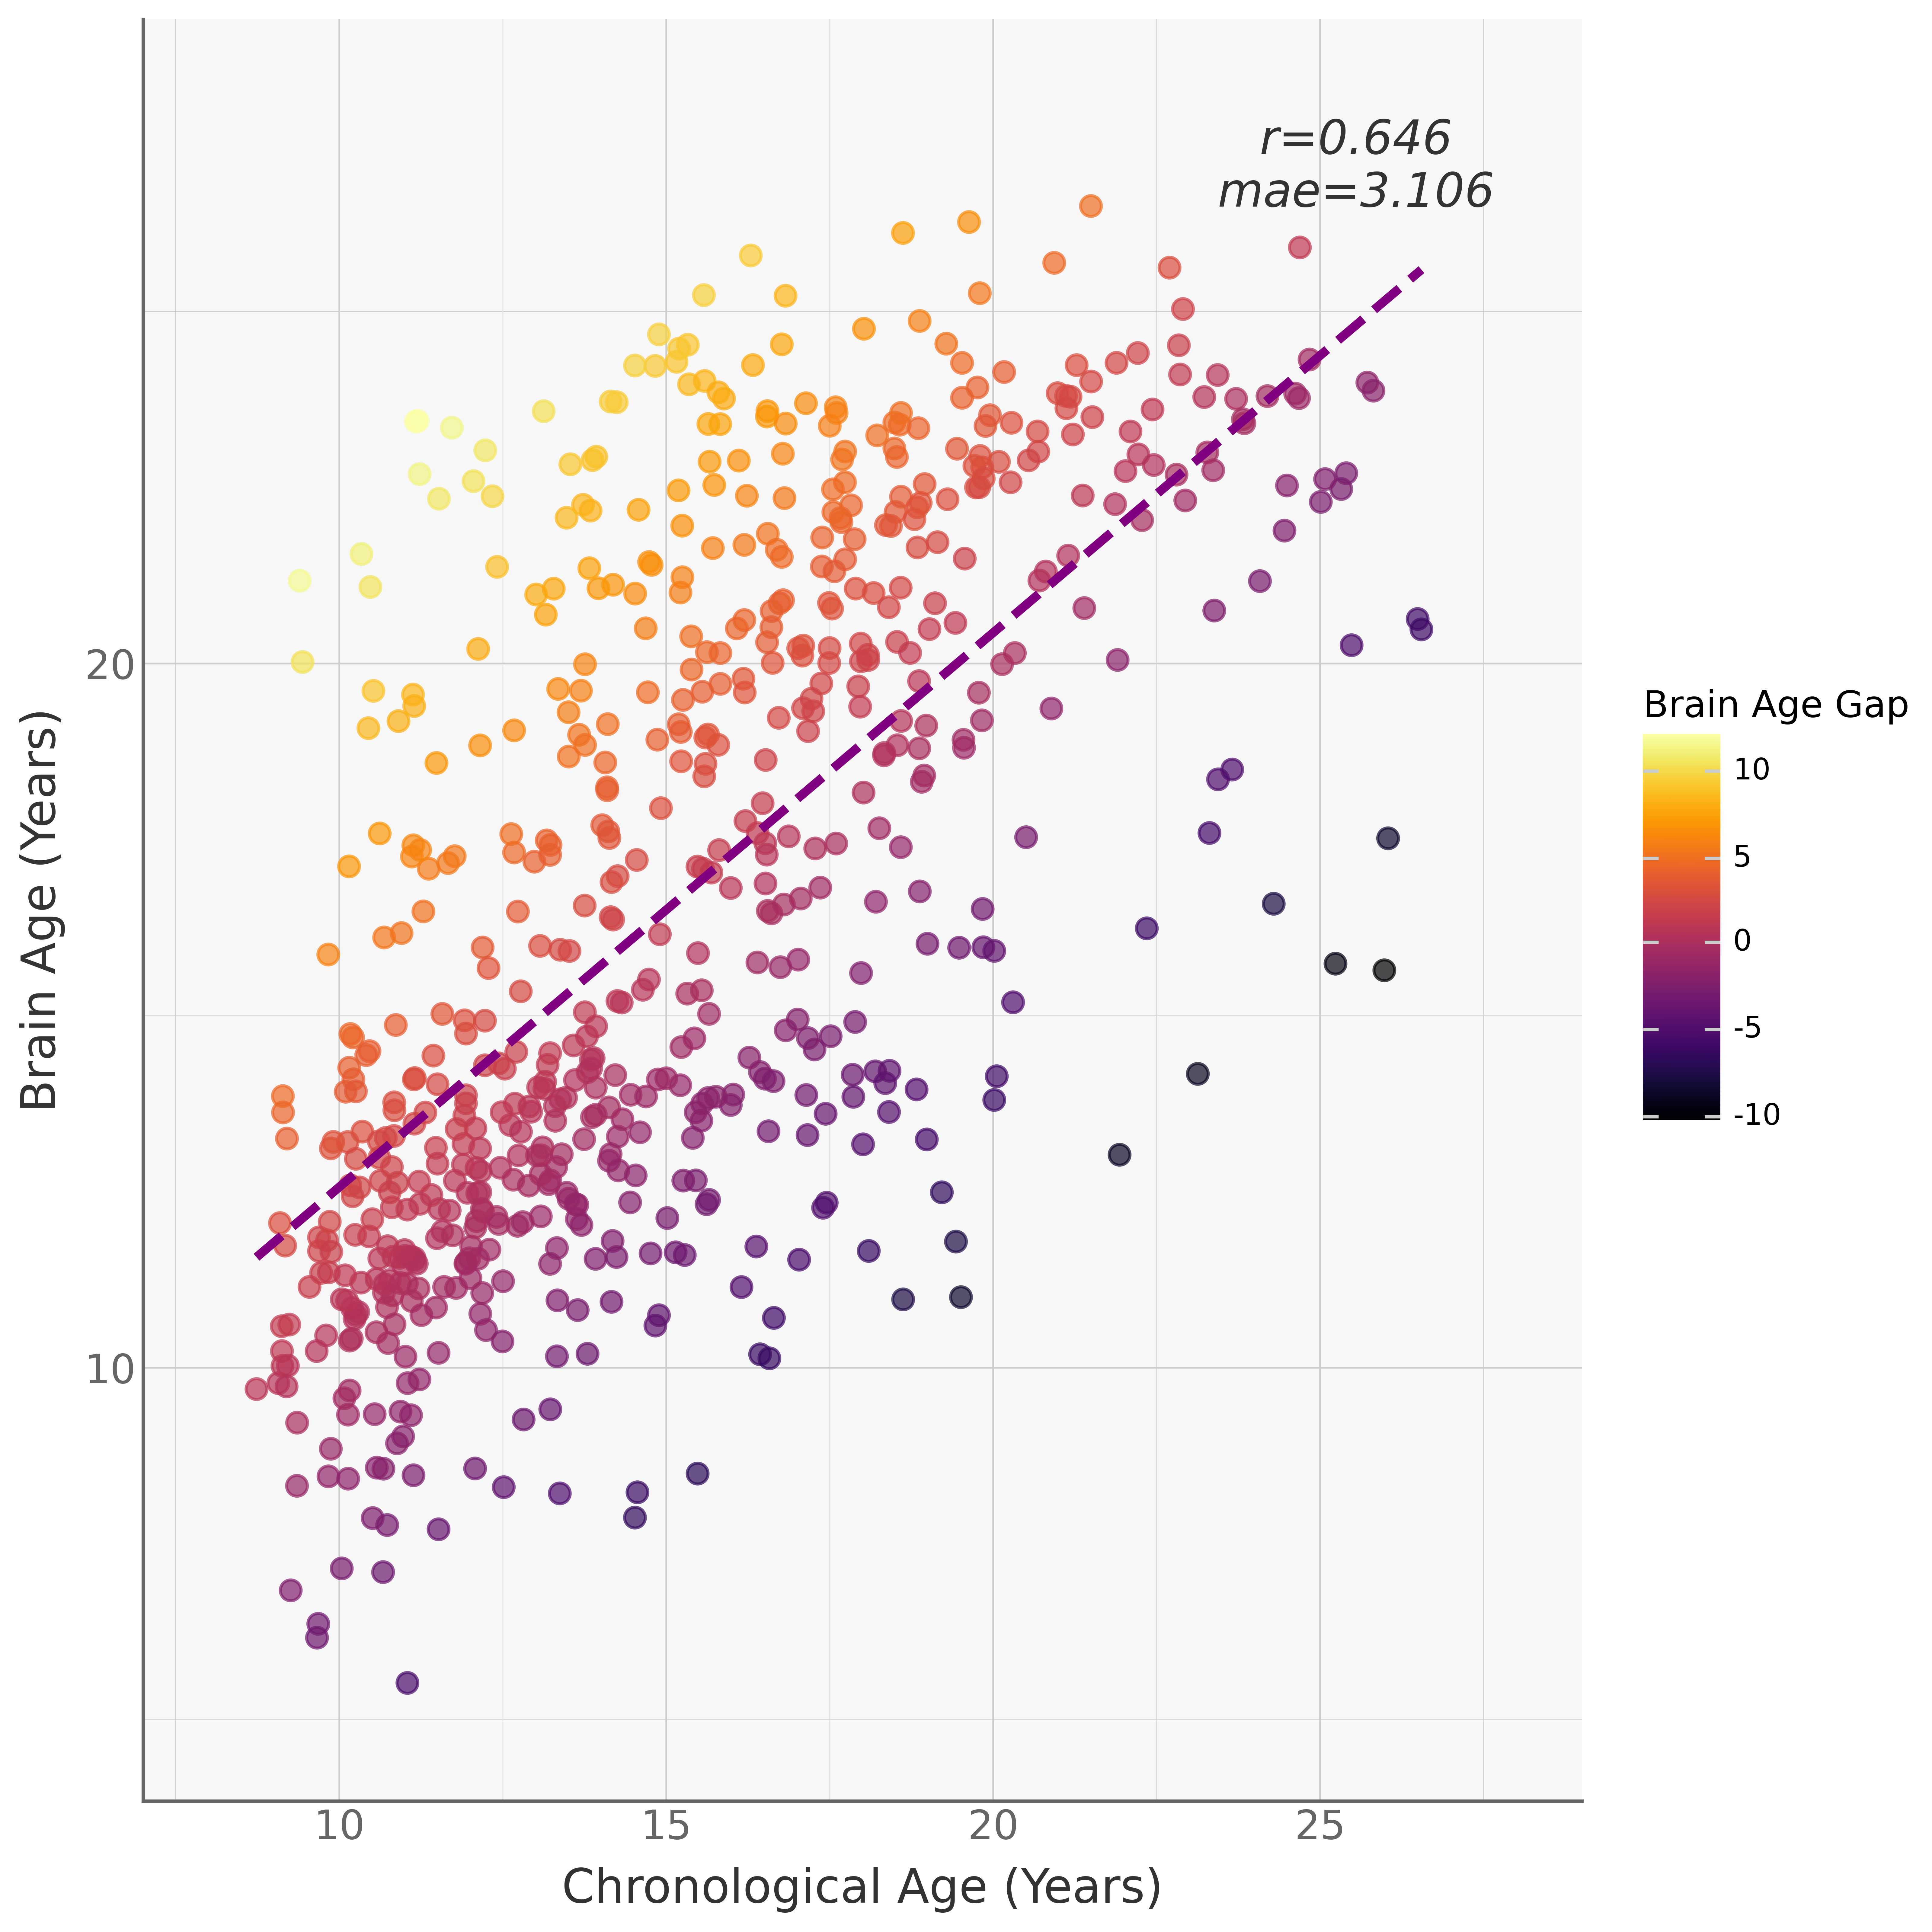

In [29]:
Image(f"{here()}/figures/frb_chronological_predicted_plot.png")

In [30]:
scatter_bag_age(df, "frb")

min age: 8.733745, median: 14.620124, max: 26.548939
<ggplot: (640 x 480)>


/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: /home/murage/Documents/repos/cnnmlp/figures/frb_bag_age_plot.png
/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/layer.py:372: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


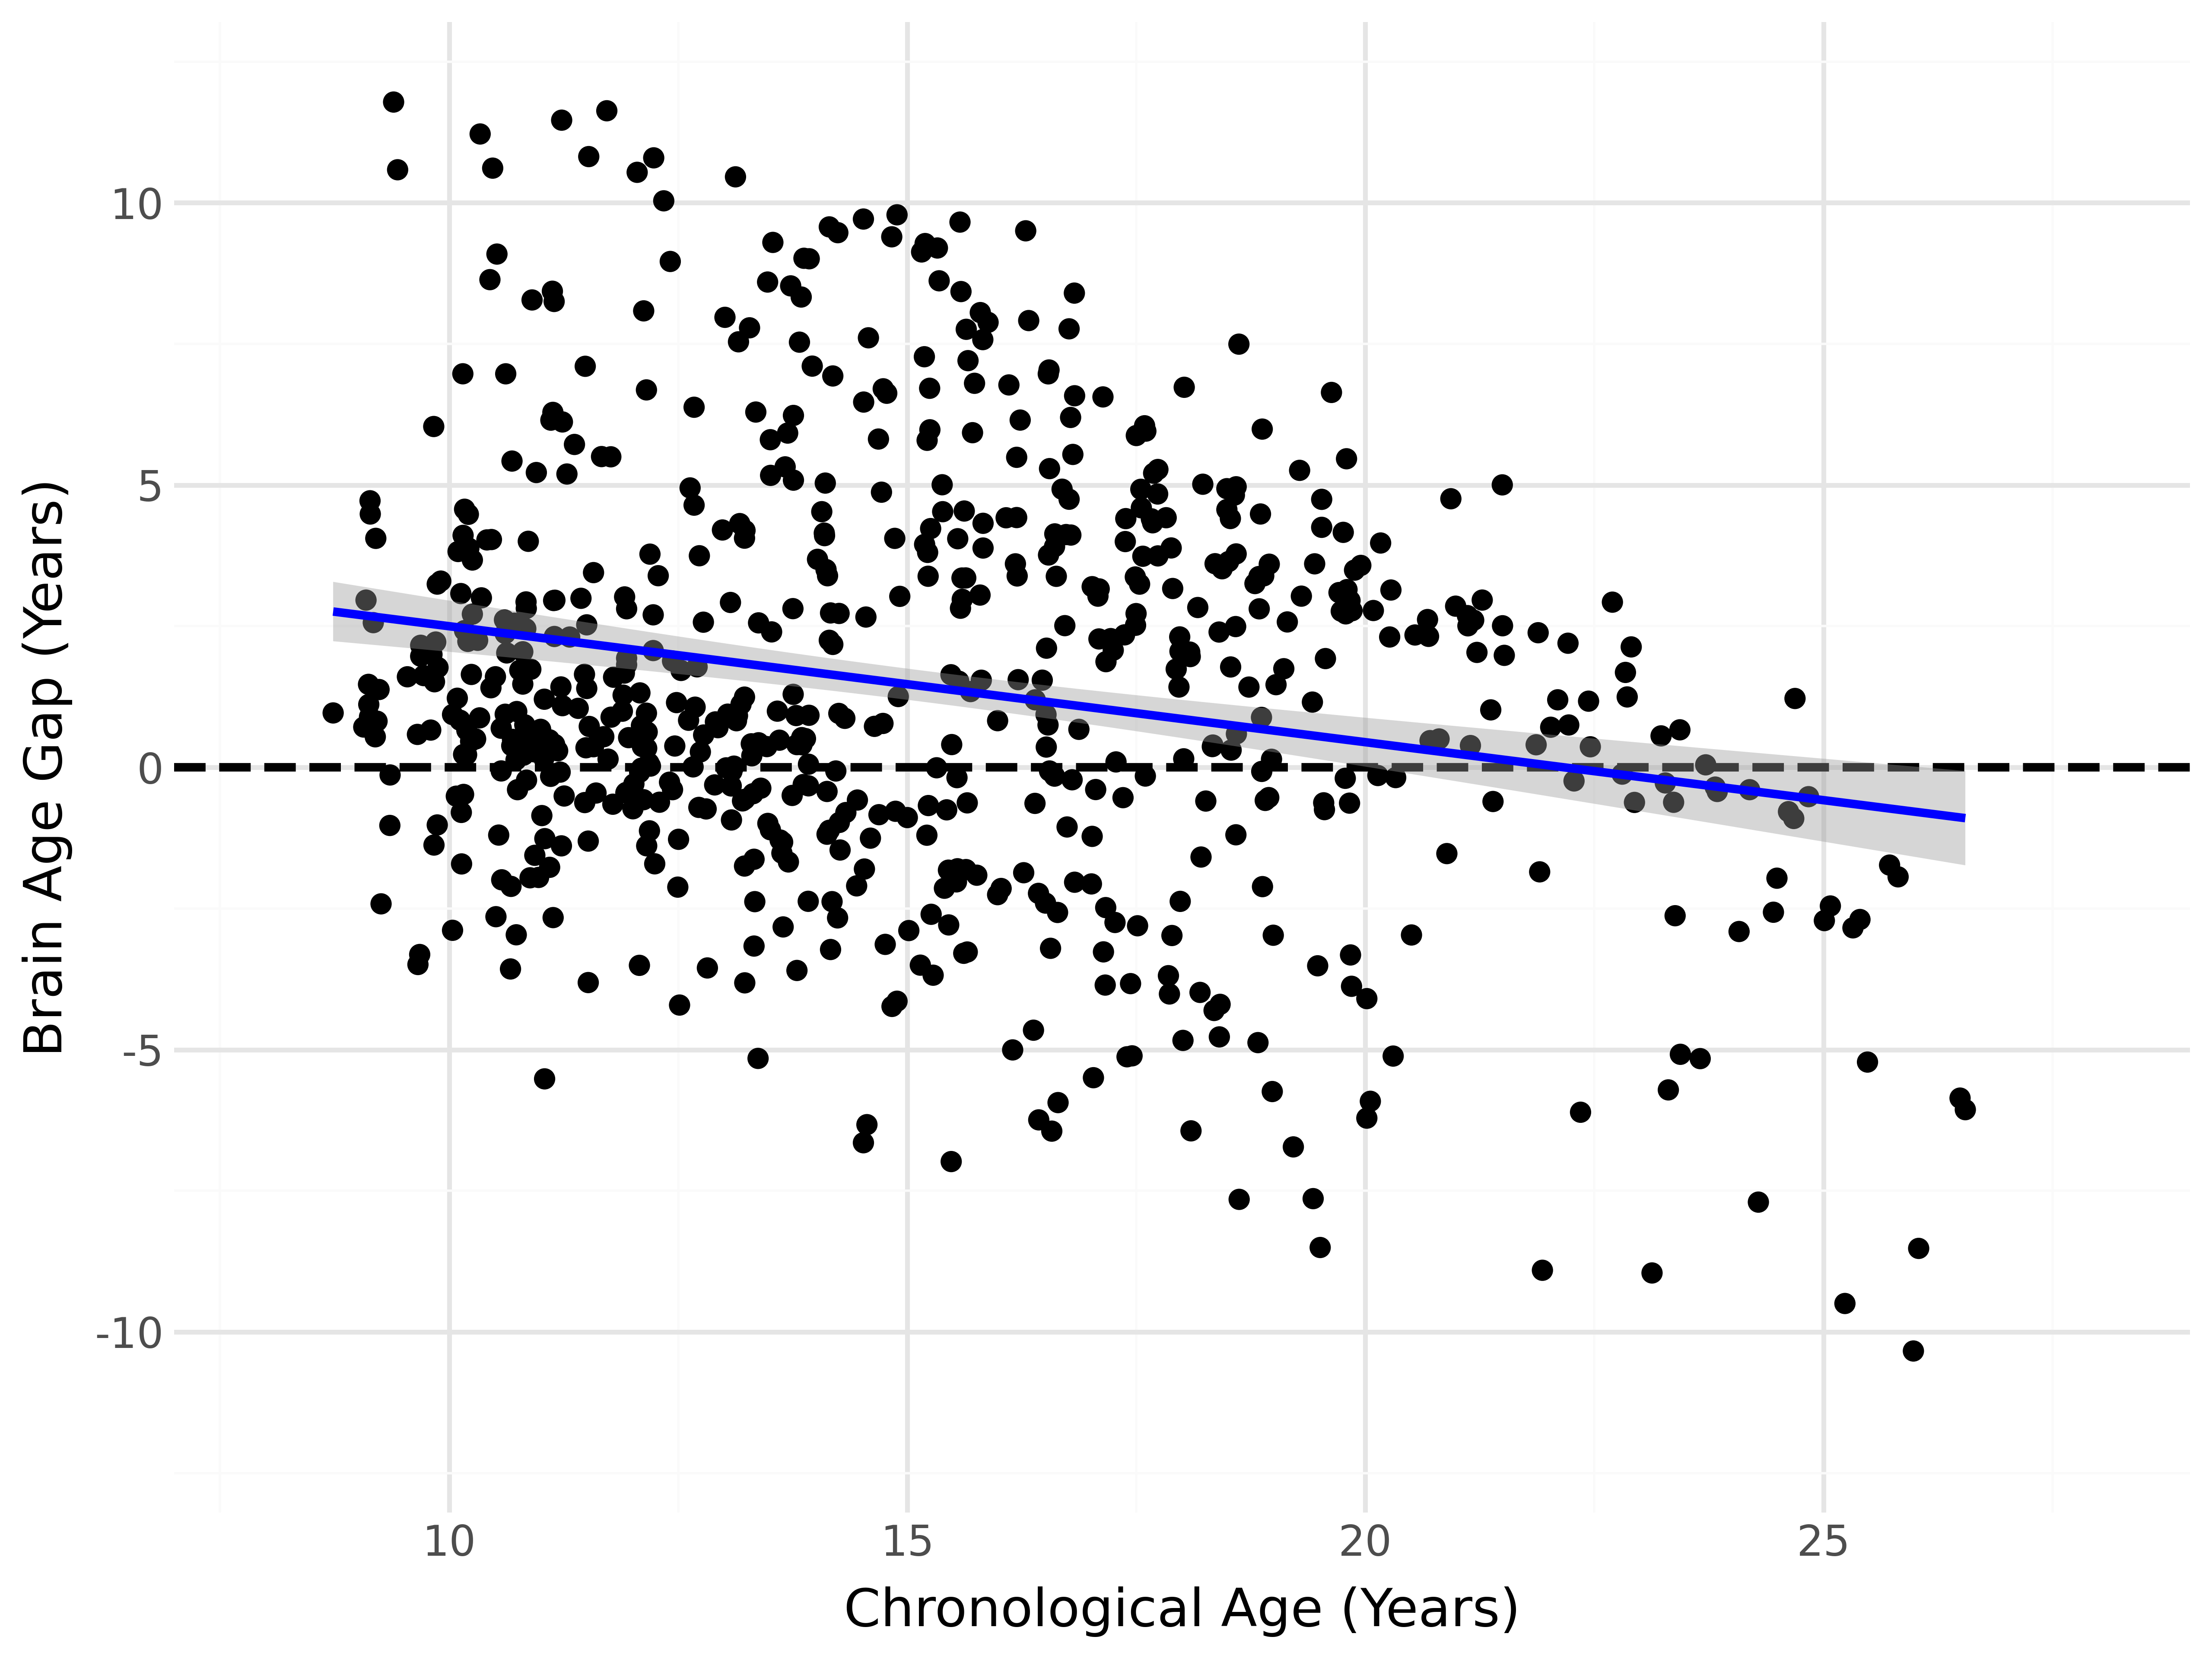

In [31]:
Image(f"{here()}/figures/frb_bag_age_plot.png")

In [32]:
brainage_distribution_plot(df, 'frb', 'blue')

<ggplot: (640 x 480)>


/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: /home/murage/Documents/repos/cnnmlp/figures/frb_brainage_distribution.png
/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_bin : Removed 10 rows containing non-finite values.
/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_density : Removed 10 rows containing non-finite values.
/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/layer.py:372: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


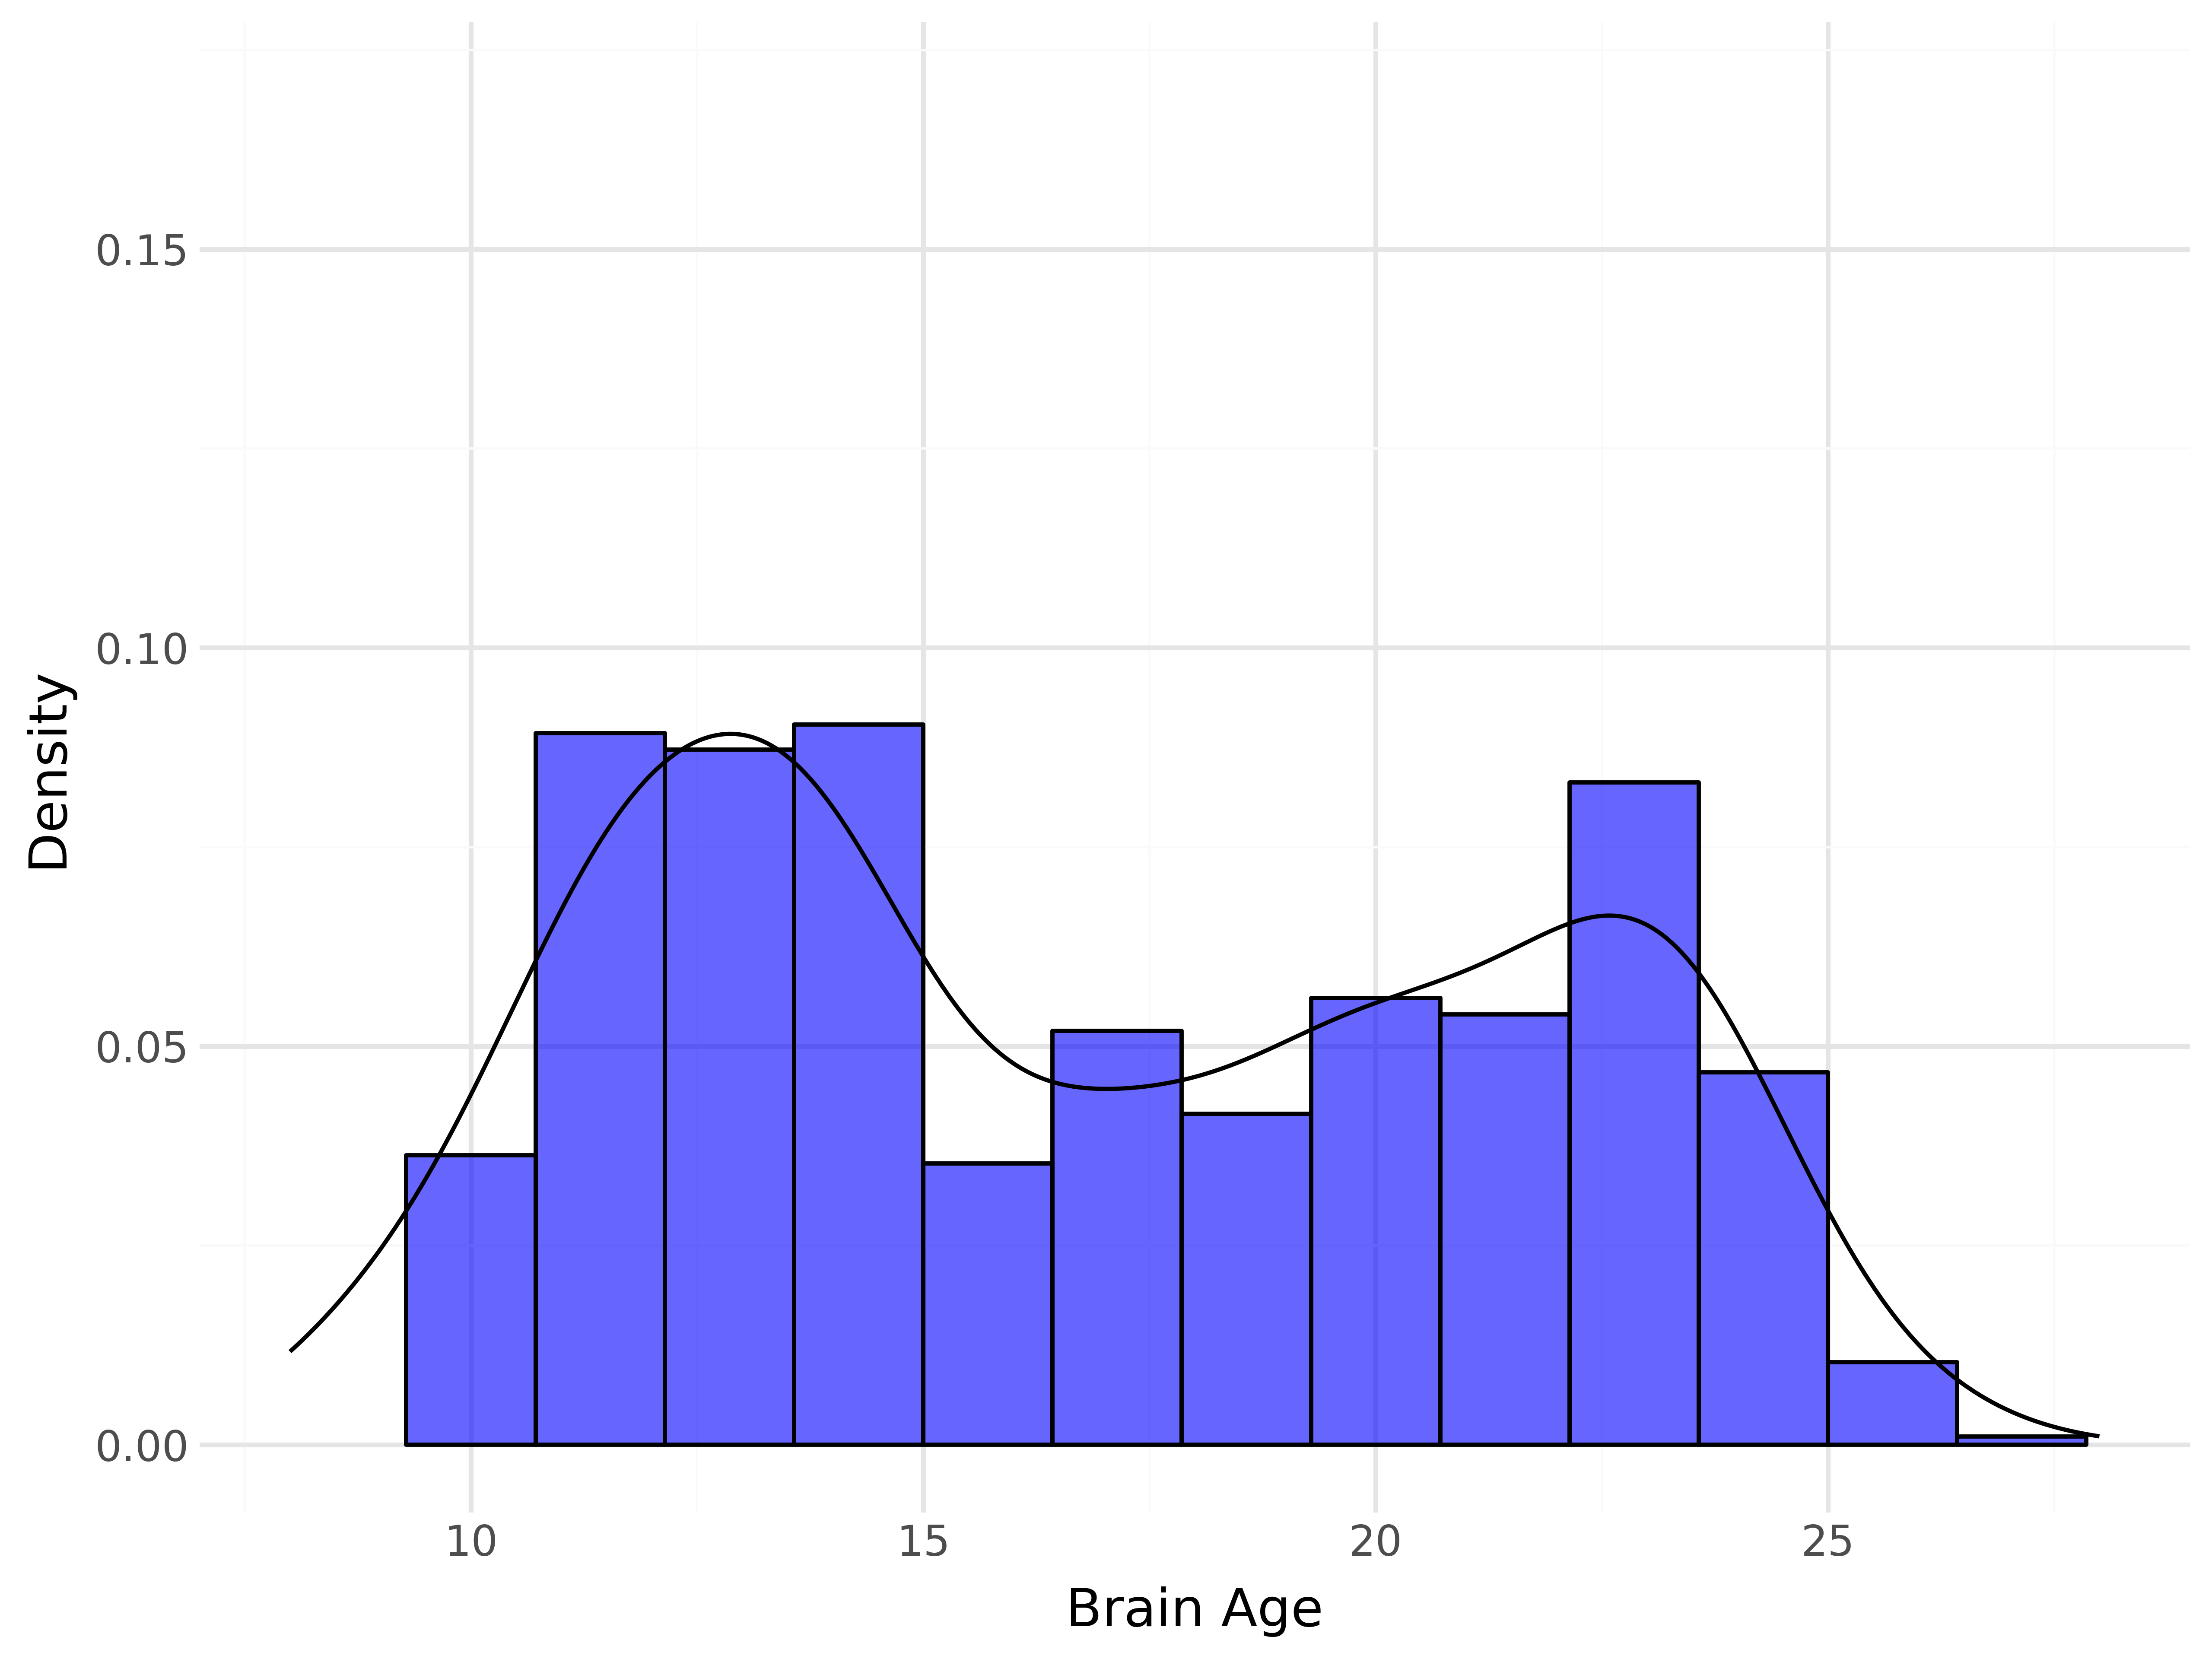

In [33]:
Image(f"{here()}/figures/frb_brainage_distribution.png")